In [52]:
from pandas_datareader import data as web
import numpy as np
import pandas as pd
from sklearn import mixture as mix
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import yfinance as yf

In [53]:
df= web.get_data_yahoo('AAPL',start= '2008-01-01', end='2017-08-01')
df=df[['Open','High','Low','Close']]

n = 10
t = 0.8
nh=15
split =int(t*len(df))

df['high']=df['High'].shift(1)
df['low']=df['Low'].shift(1)
df['close']=df['Close'].shift(1)

df['SMA']= df['close'].rolling(window=n).mean()
df['FMA']= df['close'].rolling(window=nh).mean()
df['MP'] = (df['Low'] + df['High'])/2
df['Corr']= df['SMA'].rolling(window=n).corr(df['close'])
df['Corr'][df.Corr>1]=1
df['Corr'][df.Corr<-1]=-1 
df['Return']= np.log(df['Open']/df['Open'].shift(1))

In [54]:
df.shape

(2413, 12)

In [55]:
df.head(25)

,Open,High,Low,Close,high,low,close,SMA,FMA,MP,Corr,Return
Date,,,,,,,,,,,,
2008-01-02,28.467142,28.608572,27.507143,27.834286,NaN,NaN,NaN,NaN,NaN,28.057858,NaN,NaN
2008-01-03,27.915714,28.198572,27.527143,27.847143,28.608572,27.507143,27.834286,NaN,NaN,27.862858,NaN,-0.019561
2008-01-04,27.350000,27.571428,25.555714,25.721428,28.198572,27.527143,27.847143,NaN,NaN,26.563571,NaN,-0.020473
2008-01-07,25.892857,26.228571,24.318571,25.377142,27.571428,25.555714,25.721428,NaN,NaN,25.273571,NaN,-0.054749
2008-01-08,25.734285,26.065714,24.400000,24.464285,26.228571,24.318571,25.377142,NaN,NaN,25.232857,NaN,-0.006143
2008-01-09,24.471428,25.642857,24.042856,25.628571,26.065714,24.400000,24.464285,NaN,NaN,24.842856,NaN,-0.050318
2008-01-10,25.368572,25.857143,25.058571,25.431429,25.642857,24.042856,25.628571,NaN,NaN,25.457857,NaN,0.036005
2008-01-11,25.142857,25.407143,24.285715,24.670000,25.857143,25.058571,25.431429,NaN,NaN,24.846429,NaN,-0.008937
2008-01-14,25.360001,25.631428,25.024286,25.540001,25.407143,24.285715,24.670000,NaN,NaN,25.327857,NaN,0.008599


//anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


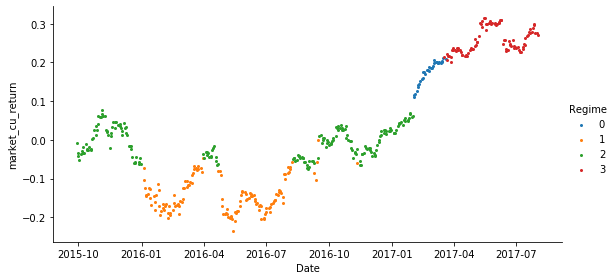

In [56]:
df=df.dropna()

ss= StandardScaler()
unsup = mix.GaussianMixture(n_components=4, 
                            covariance_type="spherical", 
                            n_init=100, 
                            random_state=42)
df=df.drop(['High','Low','Close'],axis=1)
unsup.fit(np.reshape(ss.fit_transform(df[:split]),(-1,df.shape[1])))
regime = unsup.predict(np.reshape(ss.fit_transform(df[split:]),\
                                                   (-1,df.shape[1])))

Regimes=pd.DataFrame(regime,columns=['Regime'],index=df[split:].index)\
                     .join(df[split:], how='inner')\
                          .assign(market_cu_return=df[split:]\
                                  .Return.cumsum())\
                                  .reset_index(drop=False)\
                                  .rename(columns={'index':'Date'})

order=[0,1,2,3]
fig = sns.FacetGrid(data=Regimes,hue='Regime',hue_order=order,aspect=2,size= 4)
fig.map(plt.scatter,'Date','market_cu_return', s=4).add_legend()
plt.show()

In [57]:
for i in order:
    print('Mean for regime %i: '%i,unsup.means_[i][0])
    print('Co-Variance for regime %i: '%i,(unsup.covariances_[i]))

print(Regimes.head())

ss1 =StandardScaler()
columns =Regimes.columns.drop(['Regime','Date'])    
Regimes[columns]= ss1.fit_transform(Regimes[columns])
Regimes['Signal']=0
Regimes.loc[Regimes['Return']>0,'Signal']=1
Regimes.loc[Regimes['Return']<0,'Signal']=-1
Regimes['return'] = Regimes['Return'].shift(1)
Regimes=Regimes.dropna()
       
cls= SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

split2= int(.8*len(Regimes))

Mean for regime 0:  0.7025303342118393
Co-Variance for regime 0:  0.2372431689484579
Mean for regime 1:  -1.069411097430035
Co-Variance for regime 1:  0.3327814588668379
Mean for regime 2:  -0.1508580907318006
Co-Variance for regime 2:  0.2234285471926336
Mean for regime 3:  1.7706256400580038
Co-Variance for regime 3:  0.2725854517222101
        Date  Regime        Open        high         low       close      SMA  \
0 2015-09-29       2  112.830002  114.570000  112.440002  112.440002  114.514   
1 2015-09-30       2  110.169998  113.510002  107.860001  109.059998  113.792   
2 2015-10-01       2  109.070000  111.540001  108.730003  110.300003  113.181   
3 2015-10-02       2  108.010002  109.620003  107.309998  109.580002  112.747   
4 2015-10-05       2  109.879997  111.010002  107.550003  110.379997  112.440   

          FMA          MP      Corr    Return  market_cu_return  
0  113.979333  110.685001 -0.481325 -0.009000         -0.009000  
1  113.762666  110.135002 -0.048390 -0.0

Date
2017-03-21    1
2017-03-22    1
2017-03-23    1
2017-03-24    1
2017-03-27    1
2017-03-28    1
2017-03-29    1
2017-03-30    1
2017-03-31    1
2017-04-03    1
2017-04-04    1
2017-04-05    1
2017-04-06    1
2017-04-07    1
2017-04-10    1
2017-04-11    1
2017-04-12    1
2017-04-13    1
2017-04-17    1
2017-04-18    1
2017-04-19    1
2017-04-20    1
2017-04-21    1
2017-04-24    1
2017-04-25    1
2017-04-26    1
2017-04-27    1
2017-04-28    1
2017-05-01    1
2017-05-02    1
             ..
2017-06-20    1
2017-06-21    1
2017-06-22    1
2017-06-23    1
2017-06-26    1
2017-06-27    1
2017-06-28    1
2017-06-29    1
2017-06-30    1
2017-07-03    1
2017-07-05    1
2017-07-06    1
2017-07-07    1
2017-07-10    1
2017-07-11    1
2017-07-12    1
2017-07-13    1
2017-07-14    1
2017-07-17    1
2017-07-18    1
2017-07-19    1
2017-07-20    1
2017-07-21    1
2017-07-24    1
2017-07-25    1
2017-07-26    1
2017-07-27    1
2017-07-28    1
2017-07-31    1
2017-08-01    1
Name: Pred_Signal, 

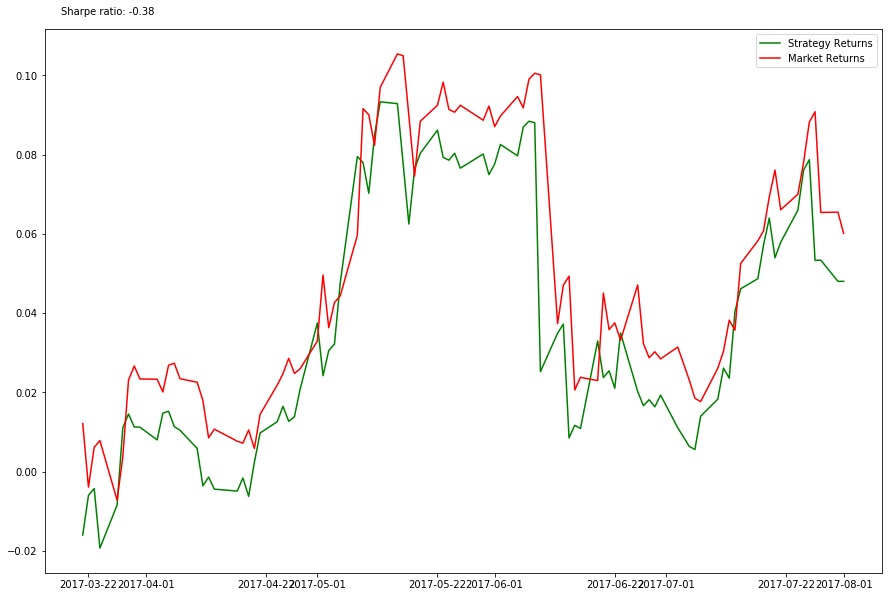

In [59]:
X = Regimes.drop(['Signal','Return','market_cu_return','Date'], axis=1)
y = Regimes['Signal']

cls.fit(X[:split2],y[:split2])

p_data=len(X)-split2

df['Pred_Signal']=0
df.iloc[-p_data:,df.columns.get_loc('Pred_Signal')]=cls.predict(X[split2:])

print(df['Pred_Signal'][-p_data:])

df['str_ret'] =df['Pred_Signal']*df['Return'].shift(-1)

df['strategy_returns']=0.
df['market_returns']=0.
df.iloc[-p_data:,df.columns.get_loc('strategy_returns')] \
       = np.nancumsum(df['str_ret'][-p_data:])
df.iloc[-p_data:,df.columns.get_loc('market_returns')] \
       = np.nancumsum(df['Return'][-p_data:])
Sharpe = (df['strategy_cu_return'][-1]-df['market_cu_return'][-1])\
           /np.nanstd(df['strategy_cu_return'][-p_data:])

plt.figure(figsize=(15,10))
plt.plot(df['strategy_returns'][-p_data:],color='g',label='Strategy Returns')
plt.plot(df['market_returns'][-p_data:],color='r',label='Market Returns')
plt.figtext(0.14,0.9,s='Sharpe ratio: %.2f'%Sharpe)
plt.legend(loc='best')
plt.show()